# Project Model Overview

## Steps in Our Model

---
* Normalize data across seasons
* Find 10 most similar player seasons historically
* Rank and weight each of those 10 players season stats
* Look at 10 players following seasons stats
* Use weighted averages to predict current players next season
* Rinse and repeat for every player in 2017-18
---

# Cleaning Our NBA Data

In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # matplotlib along with seaborne plotting graphs in JN.
%matplotlib inline

In [287]:
stats = [
    'pts',
    'min',
    'fgm',
    'fga',
    'fg3m',
    'fg3a',
    'ftm',
    'fta',
    'oreb',
    'dreb',
    'ast',
    'stl',
    'tov',
    'blk'
]

In [288]:
# Using Pandas we read in per game data from csv folder.
df = pd.read_csv('../nba-stats-csv/player_general_traditional_per_game_data.csv', header = 0)

In [289]:
df.head(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
0,471,1996-97,41.0,NaN,13.3,1.1,3.3,0.331,0.2,0.7,...,1.0,1.2,0.875,0.7,1.8,1.4,0.8,0.2,0.3,3.4
1,920,1996-97,83.0,33.0,30.8,2.8,5.8,0.483,0.0,0.2,...,1.5,2.4,0.650,2.7,5.2,0.8,0.9,0.8,0.2,7.2
2,243,1996-97,83.0,24.0,20.4,1.8,4.4,0.411,0.5,1.2,...,1.1,1.3,0.836,0.5,2.2,1.9,1.1,0.9,0.3,5.2
3,1425,1996-97,33.0,25.0,17.8,2.6,4.5,0.574,0.0,0.0,...,1.0,1.5,0.673,1.9,2.5,0.5,1.0,0.5,0.9,6.2
4,768,1996-97,47.0,27.0,11.1,1.4,3.8,0.374,0.0,0.1,...,1.1,1.8,0.643,0.7,1.3,0.4,0.7,0.3,0.6,4.0
5,228,1996-97,62.0,27.0,15.4,1.3,2.6,0.513,0.0,0.0,...,1.1,1.7,0.689,1.2,2.3,0.5,0.7,0.5,0.2,3.8
6,154,1996-97,45.0,30.0,13.1,0.9,2.0,0.435,0.0,0.0,...,0.5,1.1,0.420,1.3,2.4,0.3,0.6,0.4,0.2,2.2
7,673,1996-97,30.0,24.0,17.2,2.6,5.4,0.475,0.0,0.0,...,1.5,2.5,0.600,1.6,2.3,0.8,1.0,0.7,0.2,6.6
8,1059,1996-97,8.0,29.0,7.9,1.0,2.0,0.500,0.6,0.9,...,0.5,0.6,0.800,0.1,0.5,0.6,0.6,0.0,0.0,3.1
9,275,1996-97,81.0,26.0,34.3,5.4,12.7,0.423,1.8,4.7,...,2.2,2.7,0.803,0.5,2.4,2.2,2.1,0.5,0.2,14.8


In [290]:
df.tail(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
10623,201163,2018-19,51.0,31.0,23.1,2.2,5.4,0.418,1.2,3.1,...,0.4,0.5,0.720,0.9,3.3,1.6,0.9,0.5,0.4,6.0
10624,1628999,2018-19,2.0,22.0,6.5,0.5,2.0,0.250,0.0,0.5,...,0.0,0.0,0.000,0.5,1.0,0.0,0.0,0.5,0.0,1.0
10625,1627812,2018-19,71.0,25.0,15.0,2.2,5.0,0.435,0.8,2.1,...,0.8,0.9,0.896,0.2,1.4,1.9,0.6,0.5,0.1,5.9
10626,1629139,2018-19,15.0,24.0,11.6,1.0,3.4,0.294,0.1,1.1,...,0.5,0.7,0.700,0.3,1.8,0.5,0.4,0.3,0.1,2.6
10627,1628380,2018-19,77.0,21.0,17.6,2.5,5.2,0.473,0.5,1.6,...,1.2,1.6,0.746,1.4,2.8,0.9,1.0,0.3,0.9,6.6
10628,203897,2018-19,63.0,24.0,34.5,8.4,18.0,0.467,1.9,5.1,...,5.0,6.0,0.832,0.6,4.0,4.5,3.4,1.0,0.4,23.7
10629,1629155,2018-19,1.0,26.0,3.8,0.0,1.0,0.000,0.0,1.0,...,0.0,0.0,0.000,0.0,0.0,0.0,1.0,1.0,0.0,0.0
10630,2585,2018-19,68.0,35.0,12.9,1.3,2.8,0.440,0.0,0.1,...,1.4,1.8,0.782,1.5,2.4,1.3,0.8,0.5,0.3,3.9
10631,1629015,2018-19,6.0,19.0,18.4,2.3,5.7,0.412,1.0,2.7,...,1.0,1.3,0.750,0.5,1.7,1.7,1.0,0.3,0.3,6.7
10632,1627753,2018-19,1.0,23.0,1.0,1.0,1.0,1.000,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [291]:
df.sample(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
2448,2039,2001-02,14.0,22.0,11.2,1.6,4.1,0.386,0.3,1.0,...,0.7,0.9,0.833,0.0,0.2,0.9,0.7,0.3,0.2,4.1
9841,2746,2017-18,3.0,32.0,3.9,0.3,1.3,0.250,0.0,0.0,...,0.0,0.0,0.000,1.0,0.3,0.0,0.0,0.0,0.0,0.7
5115,2735,2007-08,76.0,25.0,29.9,4.3,7.5,0.571,0.3,0.8,...,2.9,3.6,0.807,2.3,2.6,1.5,1.3,0.9,0.6,11.8
5942,201609,2009-10,80.0,24.0,18.0,2.8,6.1,0.452,0.9,2.4,...,1.5,2.0,0.736,0.5,1.7,3.0,1.6,0.6,0.1,7.9
2452,2198,2001-02,57.0,20.0,14.3,1.6,4.3,0.387,0.0,0.0,...,1.2,1.7,0.707,1.1,2.4,0.8,0.8,0.3,0.5,4.5
3964,2584,2004-05,57.0,23.0,18.7,2.7,7.4,0.366,0.5,1.8,...,1.7,2.2,0.776,0.4,1.9,1.8,1.3,0.6,0.1,7.7
470,717,1997-98,73.0,33.0,31.9,5.6,11.3,0.493,0.4,1.6,...,4.4,5.5,0.798,2.0,7.9,3.0,2.6,0.9,1.1,16.0
7692,2546,2013-14,77.0,30.0,38.7,9.6,21.3,0.452,2.2,5.4,...,6.0,7.0,0.848,1.9,6.2,3.1,2.6,1.2,0.7,27.4
1706,959,1999-00,56.0,26.0,27.4,3.1,6.5,0.477,1.1,2.7,...,1.3,1.5,0.882,0.6,1.6,4.9,1.8,0.7,0.1,8.6
8695,2563,2015-16,1.0,35.0,42.4,6.0,14.0,0.429,1.0,2.0,...,0.0,0.0,0.000,1.0,4.0,2.0,0.0,1.0,2.0,13.0


In [292]:
list(df)

['player_id',
 'season_id',
 'gp',
 'age',
 'min',
 'fgm',
 'fga',
 'fg_pct',
 'fg3m',
 'fg3a',
 'fg3_pct',
 'ftm',
 'fta',
 'ft_pct',
 'oreb',
 'dreb',
 'ast',
 'tov',
 'stl',
 'blk',
 'pts']

In [293]:
df_cleaned = df.dropna(how='all') # delete all rows in which each col contains NaN
# 2nd param: axis=1 -> delete all columns in which each row contains NaN

In [294]:
df_cleaned['gp'].describe()

count    10633.000000
mean        52.633782
std         25.115265
min          1.000000
25%         33.000000
50%         59.000000
75%         75.000000
max         85.000000
Name: gp, dtype: float64

In [295]:
min_gp = df_cleaned['gp'].mean() - (df_cleaned['gp'].std() * 3)

In [296]:
min_gp

np.float64(-22.712012335693153)

<Axes: >

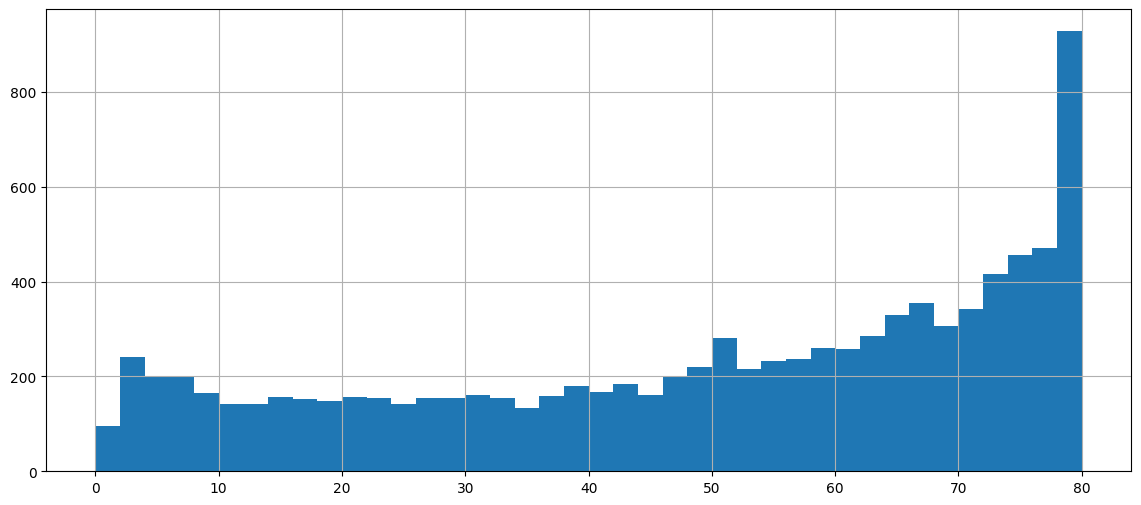

In [297]:
bin_values = np.arange(start=0, stop=82, step=2)
df_cleaned['gp'].hist(bins=bin_values, figsize=[14,6])
# Histogram of games played in our data frame 

In [298]:
min_gp = 10
df_filter = df_cleaned[df_cleaned['gp'] > min_gp]

In [299]:
x = df_cleaned['player_id'].count()
y = df_filter['player_id'].count()
print(x-y)

971


# Normalizing Data Across Seasons

In [300]:
season = df_filter['season_id'] == '2017-18'

In [301]:
df_2018 = df_filter[season]

In [302]:
df_2018.sample(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
10100,2216,2017-18,59.0,36.0,25.6,6.1,12.9,0.473,0.9,2.5,...,1.4,1.8,0.785,1.6,5.1,2.2,2.0,0.7,0.2,14.5
9792,201160,2017-18,33.0,32.0,8.6,1.4,3.5,0.391,0.1,1.0,...,0.6,0.6,0.905,0.5,1.1,0.4,0.5,0.1,0.4,3.4
9608,1626171,2017-18,73.0,23.0,22.5,5.2,11.1,0.471,1.1,3.1,...,1.6,2.1,0.769,2.2,4.6,1.7,1.4,0.7,0.3,13.2
9616,1627362,2017-18,18.0,25.0,13.1,1.1,2.4,0.442,0.2,0.6,...,0.4,0.6,0.800,0.4,1.5,1.2,0.8,1.0,0.3,2.8
9721,101141,2017-18,69.0,31.0,25.1,4.0,8.9,0.452,1.3,3.7,...,1.5,2.0,0.778,1.7,4.2,1.3,1.0,0.9,0.4,10.9
10032,203933,2017-18,65.0,24.0,33.0,8.1,16.4,0.498,0.3,1.4,...,3.0,3.9,0.757,1.9,3.2,1.3,1.3,1.0,0.6,19.6
9844,203944,2017-18,82.0,23.0,26.7,6.1,11.0,0.558,0.1,0.5,...,3.7,5.2,0.718,2.2,5.8,2.6,2.6,0.5,0.5,16.1
9723,202323,2017-18,79.0,29.0,25.7,3.3,7.3,0.447,0.5,1.7,...,1.2,1.4,0.850,0.4,2.7,2.2,1.3,0.6,0.4,8.2
9871,1627739,2017-18,52.0,24.0,29.3,5.5,12.8,0.429,0.8,2.6,...,1.6,2.2,0.737,0.5,3.8,6.0,2.9,2.0,0.5,13.4
10019,203499,2017-18,54.0,25.0,14.3,1.6,4.1,0.384,0.6,1.6,...,0.6,0.7,0.865,0.3,1.4,1.8,0.6,0.5,0.0,4.3


In [303]:
df_2018['pts_normalized'] = (df_2018['pts'] - df_2018['pts'].min()) / (df_2018['pts'].max() - df_2018['pts'].min())

C:\Users\Usuario\AppData\Local\Temp\ipykernel_18200\3801605567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['pts_normalized'] = (df_2018['pts'] - df_2018['pts'].min()) / (df_2018['pts'].max() - df_2018['pts'].min())


In [304]:
df_2018.sort_values('pts_normalized', ascending=False).head(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts,pts_normalized
9781,201935,2017-18,72.0,28.0,35.4,9.0,20.1,0.449,3.7,10.0,...,10.1,0.858,0.6,4.8,8.8,4.4,1.8,0.7,30.4,1.000000
9592,203076,2017-18,75.0,25.0,36.4,10.4,19.5,0.534,0.7,2.2,...,8.0,0.828,2.5,8.6,2.3,2.2,1.5,2.6,28.1,0.923077
9888,2544,2017-18,82.0,33.0,36.9,10.5,19.3,0.542,1.8,5.0,...,6.5,0.731,1.2,7.5,9.1,4.2,1.4,0.9,27.5,0.903010
9650,203081,2017-18,73.0,27.0,36.6,8.5,19.4,0.439,3.1,8.6,...,7.4,0.916,0.8,3.6,6.6,2.8,1.1,0.4,26.9,0.882943
9737,203507,2017-18,75.0,23.0,36.7,9.9,18.7,0.529,0.6,1.9,...,8.5,0.760,2.1,8.0,4.8,3.0,1.5,1.4,26.9,0.882943
10028,201939,2017-18,51.0,30.0,32.0,8.4,16.9,0.495,4.2,9.8,...,5.9,0.921,0.7,4.4,6.1,3.0,1.6,0.2,26.4,0.866221
9863,201142,2017-18,68.0,29.0,34.2,9.3,18.0,0.516,2.5,6.1,...,5.9,0.889,0.5,6.4,5.4,3.0,0.7,1.8,26.4,0.866221
10008,201566,2017-18,80.0,29.0,36.4,9.5,21.1,0.449,1.2,4.1,...,7.1,0.737,1.9,8.2,10.3,4.8,1.8,0.3,25.4,0.832776
9676,202326,2017-18,48.0,27.0,36.2,8.5,18.0,0.470,2.2,6.1,...,8.2,0.746,2.2,10.7,5.4,5.0,1.6,1.6,25.2,0.826087
9690,1626164,2017-18,54.0,21.0,34.5,8.4,19.5,0.432,2.7,7.1,...,6.1,0.878,0.5,4.0,4.7,3.6,0.9,0.3,24.9,0.816054


In [305]:
# We can find each player by his id in: https://www.nba.com/stats/player/ + [player_id]

In [306]:
def normalize(col):
    #df_2018['pts_normalized'] = (df_2018['pts'] - df_2018['pts'].min()) / (df_2018['pts'].max() - df_2018['pts'].min())
    #df_2018['fgm_normalized'] = (df_2018['fgm'] - df_2018['fgm'].min()) / (df_2018['fgm'].max() - df_2018['fgm'].min())
    #df_2018['ast_normalized'] = (df_2018['ast'] - df_2018['ast'].min()) / (df_2018['ast'].max() - df_2018['ast'].min())
    return (col - col.min()) / (col.max() - col.min())

In [307]:
normalize(df_2018['pts'])

9563     0.060201
9564     0.571906
9567     0.083612
9569     0.414716
9570     0.217391
           ...   
10098    0.130435
10099    0.541806
10100    0.468227
10101    0.163880
10102    0.023411
Name: pts, Length: 463, dtype: float64

In [308]:
normalize(df_2018['fgm'])

9563     0.076923
9564     0.615385
9567     0.086538
9569     0.480769
9570     0.288462
           ...   
10098    0.153846
10099    0.538462
10100    0.576923
10101    0.201923
10102    0.019231
Name: fgm, Length: 463, dtype: float64

In [309]:
normalize(df_2018['ast'])

9563     0.058252
9564     0.223301
9567     0.048544
9569     0.456311
9570     0.077670
           ...   
10098    0.077670
10099    0.291262
10100    0.213592
10101    0.155340
10102    0.009709
Name: ast, Length: 463, dtype: float64

In [310]:
cols_to_normalize = stats

In [311]:
def vorp(df): # Value Of Replacement Player
    for col_name in cols_to_normalize:
        df.loc[:, f"{col_name}_normalize"] = normalize(df[col_name])
    return df

In [312]:
df_2018_normalized = vorp(df_2018)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_18200\428088967.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, f"{col_name}_normalize"] = normalize(df[col_name])
C:\Users\Usuario\AppData\Local\Temp\ipykernel_18200\428088967.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, f"{col_name}_normalize"] = normalize(df[col_name])
C:\Users\Usuario\AppData\Local\Temp\ipykernel_18200\428088967.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [313]:
df_2018_normalized.sample(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3m_normalize,fg3a_normalize,ftm_normalize,fta_normalize,oreb_normalize,dreb_normalize,ast_normalize,stl_normalize,tov_normalize,blk_normalize
9838,203705,2017-18,18.0,28.0,12.0,0.8,2.6,0.326,0.4,1.2,...,0.095238,0.12,0.045977,0.039604,0.019608,0.065421,0.310680,0.166667,0.10,0.038462
10025,203524,2017-18,12.0,27.0,15.6,0.9,3.4,0.268,0.3,1.8,...,0.071429,0.18,0.034483,0.049505,0.156863,0.196262,0.174757,0.250000,0.16,0.038462
9704,1628407,2017-18,53.0,22.0,13.5,1.4,3.6,0.375,0.2,0.8,...,0.047619,0.08,0.045977,0.049505,0.019608,0.196262,0.067961,0.125000,0.08,0.000000
9564,203932,2017-18,58.0,22.0,32.9,6.5,14.9,0.434,2.0,5.9,...,0.476190,0.59,0.310345,0.386139,0.294118,0.579439,0.223301,0.416667,0.36,0.307692
9709,202734,2017-18,82.0,29.0,31.5,5.2,10.1,0.508,1.6,3.7,...,0.380952,0.37,0.068966,0.079208,0.137255,0.186916,0.223301,0.416667,0.24,0.038462
10007,203497,2017-18,56.0,26.0,32.4,4.9,7.9,0.622,0.0,0.0,...,0.000000,0.00,0.413793,0.524752,0.568627,0.710280,0.135922,0.333333,0.38,0.884615
10071,1627755,2017-18,71.0,22.0,23.4,3.0,7.8,0.388,0.6,2.1,...,0.142857,0.21,0.137931,0.138614,0.058824,0.121495,0.427184,0.416667,0.36,0.038462
9618,201572,2017-18,74.0,30.0,23.4,5.0,10.7,0.465,1.5,4.4,...,0.357143,0.44,0.172414,0.207921,0.196078,0.261682,0.165049,0.166667,0.26,0.500000
9636,1626191,2017-18,19.0,23.0,4.7,0.9,2.2,0.429,0.1,0.4,...,0.023810,0.04,0.057471,0.069307,0.078431,0.065421,0.019417,0.000000,0.02,0.115385
10097,1627812,2017-18,82.0,25.0,27.8,3.8,8.9,0.426,1.6,4.4,...,0.380952,0.44,0.114943,0.128713,0.058824,0.233645,0.242718,0.333333,0.20,0.038462


In [314]:
grouped = df_filter.groupby('season_id')
grouped['pts'].mean()

season_id
1996-97    8.623559
1997-98    8.562944
1998-99    8.232000
1999-00    8.531250
2000-01    8.357071
2001-02    8.404444
2002-03    8.299244
2003-04    8.422727
2004-05    8.573934
2005-06    8.368925
2006-07    8.683962
2007-08    8.747837
2008-09    9.014425
2009-10    8.913494
2010-11    8.661283
2011-12    8.370670
2012-13    8.441109
2013-14    8.616173
2014-15    8.635398
2015-16    8.805923
2016-17    8.960586
2017-18    8.979266
2018-19    9.361472
Name: pts, dtype: float64

In [315]:
df_new = df_filter.groupby(['season_id']).apply(vorp)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_18200\556466379.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_new = df_filter.groupby(['season_id']).apply(vorp)


In [316]:
df_new.sample(10)

player_id season_id    gp   age   min  fgm   fga  fg_pct  \
season_id                                                                  
2008-09   5356       2760   2008-09  81.0  26.0  28.5  3.3   6.2   0.536   
2006-07   4504       2294   2006-07  82.0  28.0  34.7  5.2  11.9   0.437   
2009-10   5999        693   2009-10  64.0  34.0   9.3  1.2   3.0   0.399   
2014-15   8182       2365   2014-15  60.0  36.0  18.9  2.0   3.5   0.580   
2005-06   4202       1519   2005-06  16.0  30.0   8.0  0.4   0.9   0.400   
          4298       1630   2005-06  47.0  30.0  12.4  1.1   2.6   0.435   
2002-03   2738       2429   2002-03  49.0  25.0  15.5  1.4   3.0   0.483   
2001-02   2461       1924   2001-02  79.0  27.0  24.2  4.7   9.7   0.483   
2013-14   8068     203501   2013-14  81.0  22.0  23.2  3.6   8.5   0.428   
2016-17   9343     203484   2016-17  76.0  24.0  33.3  4.9  12.2   0.399   

                fg3m  fg3a  ...  fg3m_normalize  fg3a_normalize  \
season_id                   ...                                   
2008-09   5356   0.0   0.0  ...        0.000000        0.000000   
2006-07   4504   1.5   4.4  ...        0.500000        0.543210   
2009-10   5999   0.0   0.1  ...        0.000000        0.014085   
2014-15   8182   0.1   0.2  ...        0.027778        0.024691   
2005-06   4202   0.0   0.0  ...        0.000000        0.000000   
          4298   0.0   0.0  ...        0.000000        0.000000   
2002-03   2738   0.0   0.0  ...        0.000000        0.000000   
2001-02   2461   0.0   0.0  ...        0.000000        0.000000   
2013-14   8068   1.6   4.4  ...        0.484848        0.556962   
2016-17   9343   2.0   5.8  ...        0.487805        0.580000   

                ftm_normalize  fta_normalize  oreb_normalize  dreb_normalize  \
season_id                                                                      
2008-09   5356       0.211111       0.289720        0.465116        0.505263   
2006-07   4504       0.174419       0.182692        0.159091        0.188119   
2009-10   5999       0.065217       0.078431        0.243902        0.126316   
2014-15   8182       0.147727       0.186275        0.245283        0.360000   
2005-06   4202       0.021277       0.026087        0.162162        0.060606   
          4298       0.106383       0.113043        0.243243        0.181818   
2002-03   2738       0.077922       0.101852        0.282609        0.223214   
2001-02   2461       0.177215       0.177570        0.260000        0.247312   
2013-14   8068       0.149425       0.161616        0.037037        0.117021   
2016-17   9343       0.217391       0.220183        0.162791        0.227723   

                ast_normalize  stl_normalize  tov_normalize  blk_normalize  
season_id                                                                   
2008-09   5356       0.090909       0.321429       0.236842       0.275862  
2006-07   4504       0.258621       0.571429       0.292683       0.000000  
2009-10   5999       0.027273       0.043478       0.078947       0.107143  
2014-15   8182       0.059406       0.173913       0.159091       0.344828  
2005-06   4202       0.009524       0.080000       0.135135       0.030303  
          4298       0.057143       0.040000       0.243243       0.090909  
2002-03   2738       0.022472       0.148148       0.138889       0.343750  
2001-02   2461       0.101852       0.250000       0.282051       0.057143  
2013-14   8068       0.074766       0.200000       0.135135       0.035714  
2016-17   9343       0.216216       0.600000       0.178571       0.076923  

[10 rows x 35 columns]

# Player Distance Function

In [317]:
def calc_distance(u, v):
    distance = np.sqrt(np.sum((u - v)**2))
    return distance

In [318]:
df1 = pd.read_csv('../nba-stats-csv/player_id_player_name.csv')

In [319]:
df2 = pd.read_csv('../nba-stats-csv/player_general_traditional_per_game_data.csv', usecols=['player_id', 'season_id', 'pts'])

In [320]:
df1.sample(5)

,player_id,player_name
206,201160,Jason Smith
482,1627812,Yogi Ferrell
299,2736,Luol Deng
374,1627835,Paul Zipser
400,201579,Roy Hibbert


In [321]:
df2.sample(5)

,player_id,season_id,pts
5248,1725,2007-08,7.8
9448,202331,2016-17,23.7
9663,201589,2017-18,2.8
7131,201234,2011-12,1.9
3476,1503,2003-04,28.0


In [322]:
df3 = pd.merge(df1, df2, on='player_id', how='left')

In [323]:
df3.sample(5)

,player_id,player_name,season_id,pts
927,2730,Dwight Howard,2005-06,15.8
1393,2592,James Jones,2012-13,1.6
616,2563,Dahntay Jones,2005-06,4.0
1471,1891,Jason Terry,2012-13,10.1
3404,203186,Willie Reed,2015-16,4.7


In [324]:
df_2019 = df3[df3['season_id'] == '2018-19']

In [325]:
df_2019.sample(10)

,player_id,player_name,season_id,pts
1229,202738,Isaiah Thomas,2018-19,8.1
764,201942,DeMar DeRozan,2018-19,21.2
1571,201975,Jodie Meeks,2018-19,6.4
3047,203933,TJ Warren,2018-19,18.0
1145,202330,Gordon Hayward,2018-19,11.5
1363,203516,James Ennis III,2018-19,6.7
629,1627745,Damian Jones,2018-19,5.4
907,202700,Donatas Motiejunas,2018-19,2.0
462,1626166,Cameron Payne,2018-19,6.3
15,203932,Aaron Gordon,2018-19,16.0


In [326]:
dame_df = df_2019[df_2019['player_name'] == 'Damian Lillard']
steph_df = df_2019[df_2019['player_name'] == 'Stephen Curry']
rudy_df = df_2019[df_2019['player_name'] == 'Rudy Gobert']

In [327]:
dame_ppg = dame_df.pts.tolist()[0]
steph_ppg = steph_df.pts.tolist()[0]
rudy_ppg = rudy_df.pts.tolist()[0]

In [328]:
calc_distance(dame_ppg, steph_ppg) # the order of params don't change the result

np.float64(1.5)

In [329]:
calc_distance(dame_ppg, rudy_ppg)

np.float64(9.9)

In [330]:
calc_distance(steph_ppg, rudy_ppg)

np.float64(11.4)

# Find Player Function

In [331]:
nba_stats = {
    'first_name': ['Jaylen','Jayson','Jrue','Derrick','Al'],
    'last_name': ['Brown','Tatum','Holiday','White','Horford'],
    'ppg': [28.2, 30.3, 14.1, 12.5, 7.8],
    'apg': [5.2, 6.1, 4.4, 4.5, 1.5],
    'rpg': [6.0, 8.4, 4.9, 3.7, 6.1]
}
celtics_df = pd.DataFrame(nba_stats, columns = ['first_name','last_name','ppg','apg','rpg'])

In [332]:
for row in celtics_df.itertuples():
    print(row.first_name, row.last_name, row.ppg)

Jaylen Brown 28.2
Jayson Tatum 30.3
Jrue Holiday 14.1
Derrick White 12.5
Al Horford 7.8


In [333]:
# read in per game data form csv folder
dataframe = pd.read_csv('../nba-stats-csv/player_general_traditional_per_game_data.csv', header = 0)

In [334]:
df_example = dataframe.sample(10)

In [335]:
for row in df_example.itertuples():
    print(row.season_id, row.player_id)

1997-98 739
2015-16 203098
2009-10 2201
2007-08 2207
2005-06 2242
2008-09 201144
2018-19 1626154
2006-07 2216
2000-01 179
2003-04 1884


In [336]:
def find_player(player_id, player_season):
    for row in df_example.itertuples():
        if player_season == row.season_id and player_id == row.player_id:
            return row

In [337]:
df_example

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
771,739,1997-98,77.0,23.0,37.6,6.1,11.4,0.533,0.1,0.5,...,2.4,3.6,0.662,1.7,4.5,2.5,2.2,1.0,1.1,14.6
8826,203098,2015-16,43.0,25.0,11.2,1.7,3.7,0.444,0.4,1.2,...,0.5,0.6,0.833,0.2,1.1,0.8,0.6,0.2,0.0,4.1
5923,2201,2009-10,7.0,27.0,8.9,1.1,3.0,0.381,0.0,0.0,...,1.4,2.4,0.588,0.6,1.3,0.0,1.9,0.0,0.1,3.7
5104,2207,2007-08,82.0,27.0,40.8,7.9,18.3,0.432,2.1,5.4,...,3.9,4.6,0.834,1.0,3.5,5.8,2.7,1.0,0.2,21.7
4392,2242,2005-06,22.0,27.0,8.7,0.7,2.2,0.327,0.0,0.1,...,0.1,0.1,1.000,0.3,1.5,0.2,0.3,0.3,0.2,1.6
5648,201144,2008-09,82.0,21.0,30.6,3.9,8.9,0.442,1.1,2.6,...,2.0,2.4,0.817,0.3,3.1,4.3,1.7,1.1,0.1,10.9
10515,1626154,2018-19,1.0,25.0,25.7,6.0,13.0,0.462,4.0,10.0,...,1.0,2.0,0.500,1.0,2.0,3.0,0.0,1.0,0.0,17.0
4887,2216,2006-07,68.0,25.0,35.7,8.8,18.9,0.467,0.2,0.7,...,5.8,7.1,0.819,2.9,7.2,2.2,3.2,0.8,0.2,23.6
1812,179,2000-01,78.0,30.0,32.1,3.1,7.8,0.401,1.2,3.1,...,2.2,2.7,0.845,0.8,2.8,2.2,1.2,1.2,0.2,9.7
3098,1884,2003-04,67.0,25.0,40.1,8.3,20.9,0.395,2.8,8.7,...,3.5,5.3,0.673,1.0,3.3,7.5,3.2,2.4,0.4,22.9


In [338]:
find_player(1504, '2001-02')

In [339]:
def find_player(df, player_id, player_season):
    for row in df.itertuples():
        if player_season == row.season_id and player_id == row.player_id:
            return row

In [340]:
dataframe.dtypes # show the type of each field in the DF

player_id      int64
season_id     object
gp           float64
age          float64
min          float64
fgm          float64
fga          float64
fg_pct       float64
fg3m         float64
fg3a         float64
fg3_pct      float64
ftm          float64
fta          float64
ft_pct       float64
oreb         float64
dreb         float64
ast          float64
tov          float64
stl          float64
blk          float64
pts          float64
dtype: object

In [341]:
player = 2544 # Lebron James
season = '2012-13'

In [342]:
find_player(dataframe, player, season)

Pandas(Index=7454, player_id=2544, season_id='2012-13', gp=76.0, age=28.0, min=37.9, fgm=10.1, fga=17.8, fg_pct=0.565, fg3m=1.4, fg3a=3.3, fg3_pct=0.406, ftm=5.3, fta=7.0, ft_pct=0.753, oreb=1.3, dreb=6.8, ast=7.3, tov=3.0, stl=1.7, blk=0.9, pts=26.8)

# Calculating Player Similarity

In [343]:
current_player_season = '2016-17'
current_player_id = 201950

In [344]:
# read in per game data from csv folder
df = pd.read_csv('../nba-stats-csv/player_general_traditional_per_game_data.csv', header = 0)

In [345]:
df_cleaned = df.dropna(how='all')

In [346]:
min_gp = 10
df_filter = df_cleaned[df_cleaned['gp'] > min_gp]

In [347]:
cols_to_normalize = [
    'pts',
    'min',
    'fgm',
    'fga',
    'fg3m',
    'fg3a',
    'ftm',
    'fta',
    'oreb',
    'dreb',
    'ast',
    'stl',
    'tov',
    'blk'
]

In [348]:
def vorp(df):
    for col_name in cols_to_normalize:
        df['{}_norm'.format(col_name)] = normalize(df[col_name])
    return df

In [349]:
df_norm = df_filter.groupby(['season_id']).apply(vorp)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_18200\1214020351.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_norm = df_filter.groupby(['season_id']).apply(vorp)


In [350]:
jrue_pts_norm = (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'pts_norm']).item()

In [351]:
jrue_pts_norm

0.474025974025974

In [352]:
# We normalize only 3 fields but we can normalize all fields we need inside the array
jrue_player_stats = [
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'pts_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'min_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'ast_norm']).item()
]

In [353]:
print(jrue_player_stats)

[0.474025974025974, 0.8530259365994238, 0.6486486486486487]


In [354]:
current_player_vector = np.array(jrue_player_stats)

In [355]:
current_player_vector

array([0.47402597, 0.85302594, 0.64864865])

In [356]:
compared_player_season = '2013-14'
compared_player_id = 203077

In [357]:
mkg_player_stats = [
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'pts_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'min_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'ast_norm']).item()
]

In [358]:
compared_player_vector = np.array(mkg_player_stats)

In [359]:
compared_player_vector

array([0.21766562, 0.59833795, 0.07476636])

In [360]:
vfunc = np.vectorize(calc_distance)

In [361]:
distance_vect = vfunc(current_player_vector, compared_player_vector)

In [362]:
distance_vect # We obtained the distance between each field for our 2 example players.
# [a1 b1] - [a2 b2] = [(a1-a2), (b1-b2), (c1-c2), (d1-d2)]
# [c1 d1]   [c2 d2]

array([0.25636036, 0.25468799, 0.57388229])

In [363]:
number = np.sum(np.abs(distance_vect) / len(distance_vect))

In [364]:
number # This number measures the similarity in these 3 fields [pts,min,ast] between jrue and mkg.

np.float64(0.36164354628446654)

# Comparing Multiple Players in a For Loop

In [365]:
player_distance = []

In [366]:
df_sample = df_norm.sample(10)

In [367]:
df_sample.head(10)

,,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3m_norm,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm
season_id,,,,,,,,,,,,,,,,,,,,,,
2002-03,3030,1501,2002-03,80.0,26.0,29.5,5.2,11.6,0.443,1.2,3.3,...,0.461538,0.440000,0.233766,0.212963,0.260870,0.312500,0.146067,0.333333,0.444444,0.187500
2005-06,4347,109,2005-06,63.0,35.0,18.8,1.8,4.6,0.384,0.8,2.3,...,0.235294,0.273810,0.074468,0.095652,0.297297,0.272727,0.123810,0.280000,0.189189,0.242424
2017-18,10003,1627758,2017-18,29.0,25.0,13.3,0.7,2.0,0.339,0.4,1.1,...,0.095238,0.110000,0.080460,0.089109,0.039216,0.065421,0.155340,0.375000,0.120000,0.076923
2005-06,4007,101194,2005-06,16.0,23.0,5.5,0.9,1.9,0.452,0.3,0.6,...,0.088235,0.071429,0.010638,0.008696,0.000000,0.040404,0.028571,0.040000,0.054054,0.000000
2006-07,4737,1709,2006-07,24.0,32.0,9.7,0.8,1.9,0.413,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.136364,0.108911,0.017241,0.142857,0.146341,0.151515
1998-99,890,297,1998-99,46.0,29.0,38.2,7.0,13.8,0.512,0.0,0.0,...,0.000000,0.000000,0.779221,0.901961,0.729167,0.782609,0.148148,0.259259,0.805556,1.000000
2011-12,7079,2767,2011-12,34.0,30.0,10.4,0.8,2.1,0.356,0.5,1.6,...,0.185185,0.231884,0.000000,0.018868,0.000000,0.028846,0.025641,0.160000,0.051282,0.000000
1996-97,323,970,1996-97,57.0,23.0,15.7,2.0,3.6,0.549,0.0,0.1,...,0.000000,0.012987,0.140625,0.148936,0.220339,0.200000,0.026316,0.074074,0.227273,0.117647
2010-11,6472,201950,2010-11,82.0,21.0,35.4,5.4,12.2,0.446,1.0,2.7,...,0.416667,0.428571,0.276316,0.213675,0.177778,0.278846,0.570175,0.625000,0.692308,0.153846


In [368]:
# We will nest all rows from our previous example
for row in df_sample.itertuples():
    compared_player_vector = np.array([
        row.pts_norm,
        row.min_norm,
        row.ast_norm
    ])
    
    vfunc = np.vectorize(calc_distance)
    distance_vect = vfunc(current_player_vector, compared_player_vector)
    number = np.sum(np.abs(distance_vect)) / len(distance_vect)
    player_distance.append(number)
    player = row.player_id
    print('Done with ' + str(player) + '. Percent error was ' + str(round(1 - number, 1)))

Done with 1501. Percent error was 0.7
Done with 109. Percent error was 0.6
Done with 1627758. Percent error was 0.5
Done with 101194. Percent error was 0.4
Done with 1709. Percent error was 0.4
Done with 297. Percent error was 0.7
Done with 2767. Percent error was 0.4
Done with 970. Percent error was 0.5
Done with 201950. Percent error was 1.0
Done with 2039. Percent error was 0.7


In [369]:
player_distance

[np.float64(0.2504010060778716),
 np.float64(0.43904582497433225),
 np.float64(0.47963217593420765),
 np.float64(0.6074171509387813),
 np.float64(0.5887209898881135),
 np.float64(0.2782759354009684),
 np.float64(0.5689821247969431),
 np.float64(0.49803266301196353),
 np.float64(0.03843746546869731),
 np.float64(0.3374636414437246)]

In [370]:
df_sample['distance'] = player_distance # the shorter the distance the better

In [371]:
ranked_df = df_sample.sort_values('distance')

In [372]:
ranked_df.head(10)

player_id season_id    gp   age   min  fgm   fga  fg_pct  \
season_id                                                                   
2010-11   6472      201950   2010-11  82.0  21.0  35.4  5.4  12.2   0.446   
2002-03   3030        1501   2002-03  80.0  26.0  29.5  5.2  11.6   0.443   
1998-99   890          297   1998-99  46.0  29.0  38.2  7.0  13.8   0.512   
2005-06   4228        2039   2005-06  50.0  26.0  22.7  3.6   8.1   0.440   
          4347         109   2005-06  63.0  35.0  18.8  1.8   4.6   0.384   
2017-18   10003    1627758   2017-18  29.0  25.0  13.3  0.7   2.0   0.339   
1996-97   323          970   1996-97  57.0  23.0  15.7  2.0   3.6   0.549   
2011-12   7079        2767   2011-12  34.0  30.0  10.4  0.8   2.1   0.356   
2006-07   4737        1709   2006-07  24.0  32.0   9.7  0.8   1.9   0.413   
2005-06   4007      101194   2005-06  16.0  23.0   5.5  0.9   1.9   0.452   

                 fg3m  fg3a  ...  fg3a_norm  ftm_norm  fta_norm  oreb_norm  \
season_id                    ...                                             
2010-11   6472    1.0   2.7  ...   0.428571  0.276316  0.213675   0.177778   
2002-03   3030    1.2   3.3  ...   0.440000  0.233766  0.212963   0.260870   
1998-99   890     0.0   0.0  ...   0.000000  0.779221  0.901961   0.729167   
2005-06   4228    0.3   0.9  ...   0.107143  0.212766  0.208696   0.054054   
          4347    0.8   2.3  ...   0.273810  0.074468  0.095652   0.297297   
2017-18   10003   0.4   1.1  ...   0.110000  0.080460  0.089109   0.039216   
1996-97   323     0.0   0.1  ...   0.012987  0.140625  0.148936   0.220339   
2011-12   7079    0.5   1.6  ...   0.231884  0.000000  0.018868   0.000000   
2006-07   4737    0.0   0.0  ...   0.000000  0.000000  0.000000   0.136364   
2005-06   4007    0.3   0.6  ...   0.071429  0.010638  0.008696   0.000000   

                 dreb_norm  ast_norm  stl_norm  tov_norm  blk_norm  distance  
season_id                                                                     
2010-11   6472    0.278846  0.570175  0.625000  0.692308  0.153846  0.038437  
2002-03   3030    0.312500  0.146067  0.333333  0.444444  0.187500  0.250401  
1998-99   890     0.782609  0.148148  0.259259  0.805556  1.000000  0.278276  
2005-06   4228    0.131313  0.209524  0.400000  0.432432  0.030303  0.337464  
          4347    0.272727  0.123810  0.280000  0.189189  0.242424  0.439046  
2017-18   10003   0.065421  0.155340  0.375000  0.120000  0.076923  0.479632  
1996-97   323     0.200000  0.026316  0.074074  0.227273  0.117647  0.498033  
2011-12   7079    0.028846  0.025641  0.160000  0.051282  0.000000  0.568982  
2006-07   4737    0.108911  0.017241  0.142857  0.146341  0.151515  0.588721  
2005-06   4007    0.040404  0.028571  0.040000  0.054054  0.000000  0.607417  

[10 rows x 36 columns]

In [373]:
import pandas as pd

In [374]:
df1 = pd.read_csv('../nba-stats-csv/player_info.csv')

In [375]:
df_final = pd.merge(ranked_df, df1, on=['player_id'], how='left').drop_duplicates()

In [376]:
df_final = df_final[['player_name', 'player_id', 'distance']]

In [377]:
df_final

,player_name,player_id,distance
0,Jrue Holiday,201950,0.038437
1,Jrue Holiday,201950,0.038437
2,Jrue Holiday,201950,0.038437
3,Jrue Holiday,201950,0.038437
4,Jrue Holiday,201950,0.038437
...,...,...,...
249,Michael Olowokandi,1709,0.588721
250,Michael Olowokandi,1709,0.588721
269,Anthony Roberson,101194,0.607417
270,Anthony Roberson,101194,0.607417


# Weighting Stat Projections

In [378]:
season_list = [
    '1996-97',
    '1997-98',
    '1998-99',
    '1999-00',
    '2000-01',
    '2001-02',
    '2002-03',
    '2003-04',
    '2004-05',
    '2005-06',
    '2006-07',
    '2007-08',
    '2008-09',
    '2009-10',
    '2010-11',
    '2011-12',
    '2012-13',
    '2013-14',
    '2014-15',
    '2015-16',
    '2016-17',
    '2017-18',
    '2018-19'
]

In [379]:
season_id = season_list[18]
print(season_id)

2014-15


In [380]:
season_id = '2014-15'
value = season_list.index(season_id)
print(value)

18


In [381]:
current_season = season_list[(season_list.index(season_id))]
print(current_season)

2014-15


In [382]:
next_season = season_list[(season_list.index(season_id) + 1)]
print(next_season)

2015-16


In [383]:
ranked_df.head(10)

player_id season_id    gp   age   min  fgm   fga  fg_pct  \
season_id                                                                   
2010-11   6472      201950   2010-11  82.0  21.0  35.4  5.4  12.2   0.446   
2002-03   3030        1501   2002-03  80.0  26.0  29.5  5.2  11.6   0.443   
1998-99   890          297   1998-99  46.0  29.0  38.2  7.0  13.8   0.512   
2005-06   4228        2039   2005-06  50.0  26.0  22.7  3.6   8.1   0.440   
          4347         109   2005-06  63.0  35.0  18.8  1.8   4.6   0.384   
2017-18   10003    1627758   2017-18  29.0  25.0  13.3  0.7   2.0   0.339   
1996-97   323          970   1996-97  57.0  23.0  15.7  2.0   3.6   0.549   
2011-12   7079        2767   2011-12  34.0  30.0  10.4  0.8   2.1   0.356   
2006-07   4737        1709   2006-07  24.0  32.0   9.7  0.8   1.9   0.413   
2005-06   4007      101194   2005-06  16.0  23.0   5.5  0.9   1.9   0.452   

                 fg3m  fg3a  ...  fg3a_norm  ftm_norm  fta_norm  oreb_norm  \
season_id                    ...                                             
2010-11   6472    1.0   2.7  ...   0.428571  0.276316  0.213675   0.177778   
2002-03   3030    1.2   3.3  ...   0.440000  0.233766  0.212963   0.260870   
1998-99   890     0.0   0.0  ...   0.000000  0.779221  0.901961   0.729167   
2005-06   4228    0.3   0.9  ...   0.107143  0.212766  0.208696   0.054054   
          4347    0.8   2.3  ...   0.273810  0.074468  0.095652   0.297297   
2017-18   10003   0.4   1.1  ...   0.110000  0.080460  0.089109   0.039216   
1996-97   323     0.0   0.1  ...   0.012987  0.140625  0.148936   0.220339   
2011-12   7079    0.5   1.6  ...   0.231884  0.000000  0.018868   0.000000   
2006-07   4737    0.0   0.0  ...   0.000000  0.000000  0.000000   0.136364   
2005-06   4007    0.3   0.6  ...   0.071429  0.010638  0.008696   0.000000   

                 dreb_norm  ast_norm  stl_norm  tov_norm  blk_norm  distance  
season_id                                                                     
2010-11   6472    0.278846  0.570175  0.625000  0.692308  0.153846  0.038437  
2002-03   3030    0.312500  0.146067  0.333333  0.444444  0.187500  0.250401  
1998-99   890     0.782609  0.148148  0.259259  0.805556  1.000000  0.278276  
2005-06   4228    0.131313  0.209524  0.400000  0.432432  0.030303  0.337464  
          4347    0.272727  0.123810  0.280000  0.189189  0.242424  0.439046  
2017-18   10003   0.065421  0.155340  0.375000  0.120000  0.076923  0.479632  
1996-97   323     0.200000  0.026316  0.074074  0.227273  0.117647  0.498033  
2011-12   7079    0.028846  0.025641  0.160000  0.051282  0.000000  0.568982  
2006-07   4737    0.108911  0.017241  0.142857  0.146341  0.151515  0.588721  
2005-06   4007    0.040404  0.028571  0.040000  0.054054  0.000000  0.607417  

[10 rows x 36 columns]

In [384]:
print(current_player_id)
print(current_player_season)

201950
2016-17


In [385]:
test_df = ranked_df.iloc[0]

In [386]:
weight = (1 / test_df.distance)
print(weight)

26.016283534989572


In [387]:
stats = [
    'pts',
    'min',
    'fgm',
    'fga',
    'fg3m',
    'fg3a',
    'ftm',
    'fta',
    'oreb',
    'dreb',
    'ast',
    'stl',
    'tov',
    'blk'
]

In [388]:
projected_stats = {}

In [389]:
for col in stats:
    sum_stat = test_df[col] * weight
    projected_stats['proj_' + col] = (sum_stat / weight)

In [390]:
projected_stats

{'proj_pts': np.float64(14.0),
 'proj_min': np.float64(35.4),
 'proj_fgm': np.float64(5.4),
 'proj_fga': np.float64(12.2),
 'proj_fg3m': np.float64(1.0),
 'proj_fg3a': np.float64(2.7),
 'proj_ftm': np.float64(2.1),
 'proj_fta': np.float64(2.5),
 'proj_oreb': np.float64(0.8),
 'proj_dreb': np.float64(3.2),
 'proj_ast': np.float64(6.5),
 'proj_stl': np.float64(1.5),
 'proj_tov': np.float64(2.7),
 'proj_blk': np.float64(0.4)}

In [391]:
projected_stats = {}

In [392]:
sum_stat = 0
sum_weight = 0

In [393]:
for row in ranked_df.itertuples():
    weight = (1 / row.distance)
    sum_stat += row.pts + weight
    sum_weight += weight

In [394]:
proj_points = (sum_stat / sum_weight)

In [395]:
proj_points

2.5632919768144036

In [396]:
for col in stats:
    sum_stat = 0
    sum_weight = 0
    for index, row in ranked_df.iterrows():
        weight = (1 / row.distance)
        sum_stat += row[col] + weight
        sum_weight += weight
    projected_stats['player_id'] = current_player_id
    projected_stats['proj_season_id'] = season_list[(season_list.index(current_player_season) + 1)]
    projected_stats['proj_' + col] = (sum_stat / sum_weight)

In [397]:
projected_stats # Stats are in a dictionary but we can convert it into a DF

{'player_id': 201950,
 'proj_season_id': '2017-18',
 'proj_pts': 2.5632919768144036,
 'proj_min': 5.146574724120228,
 'proj_fgm': 1.5870150964868999,
 'proj_fga': 2.2864373391095887,
 'proj_fg3m': 1.0936726217798245,
 'proj_fg3a': 1.2622833409835084,
 'proj_ftm': 1.2997523896954382,
 'proj_fta': 1.420485991100545,
 'proj_oreb': 1.1873452435596488,
 'proj_dreb': 1.4975057023417342,
 'proj_ast': 1.3247317555033913,
 'proj_stl': 1.139468125761072,
 'proj_tov': 1.2602017271661792,
 'proj_blk': 1.1436313533957307}

# Weighted Average Using Multiple Players Next Season

In [398]:
for col in stats:
    sum_stat = 0
    sum_weight = 0
    for index, row in ranked_df.iloc[1:11].iterrows():
        if row.season_id == '2017-18':
            continue
        weight = (1 / row.distance)
        next_season = season_list[(season_list.index(row.season_id))] # + 1
        player_next_season = find_player(ranked_df, row.player_id, next_season)
        if player_next_season == None:
            continue
        sum_stat += getattr(player_next_season, col) * weight
        sum_weight += weight
    projected_stats['player_id'] = current_player_id
    projected_stats['proj_season_id'] = season_list[(season_list.index(current_player_season))]

# Player Comparison Tool Function

In [399]:
# Let's create the main event

In [400]:
def player_comparison_tool(df, current_player_season, current_player_id):
    if (((df['season_id'] == current_player_season) & (df['player_id'] == current_player_id)).any() == False):
        print('Can\'t find player with id {} and season {}'.format(current_player_id, current_player_season))
        return
    for row in df.itertuples():
        if current_player_season == row.season_id and current_player_id == row.player_id:
            current_player_id = row.player_id
            break

    current_player_vector = np.array([
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'pts_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'min_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'fgm_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'fga_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'fg3m_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'fg3a_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'ftm_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'fta_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'oreb_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'dreb_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'ast_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'stl_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'tov_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'blk_norm']).item()
    ])
    
    print('Projecting player_id {0} for season {1}').format(current_player_id, season_list[(season_list.index(row.season_id) +1)])

    player_distance = []

    #weighted_numbers = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

    for row in df.itertuples():
        compared_player_vector = np.array([
            row.pts_norm,
            row.min_norm,
            row.fgm_norm,
            row.fga_norm,
            row.fg3m_norm,
            row.fg3a_norm,
            row.ftm_norm,
            row.fta_norm,
            row.oreb_norm,
            row.dreb_norm,
            row.ast_norm,
            row.stl_norm,
            row.tov_norm,
            row.blk_norm
        ])

        vfunc = np.vectorize(calc_distance)
        distance_vect = vfunc(current_player_vector, compared_player_vector)

        #weighted_distance = distance_vect * weighted_numbers
        #number = np.sum(np.abs(weighted_distance)) / len(distance_vect)
        
        number = np.sum(np.abs(distance_vect)) / len(distance_vect)
        player_distance.append(number)

    df['distance'] = player_distance

    ranked_df = df.sort_values('distance')

    stats = [
    'pts',
    'min',
    'fgm',
    'fga',
    'fg3m',
    'fg3a',
    'ftm',
    'fta',
    'oreb',
    'dreb',
    'ast',
    'stl',
    'tov',
    'blk'
    ]

    projected_stats = {}

    for col in stats:
        sum_stat = 0
        sum_weight = 0
        for index, row in ranked_df.iloc[1:11].iterrows():
            # skip over the row if it was 2017-18 season because we cant take the next
            if row.season_id == '2017-18':
                continue
            # get the plaayers next season
            weight = (1 / row.distance)
            next_season = season_list[(season_list.index(current_player_season) + 1)]
            # find the player row with the id and the next season
            player_next_season = find_player(ranked_df, row.player_id, next_season)
            # if player_next_season doesn't exist then skip
            if player_next_season == None:
                continue
            sum_stat = getattr(player_next_season, col) * weight
            sum_weight += weight
        projected_stats['player_id'] = current_player_id
        projected_stats['proj_season_id'] = season_list[(season_list.index(current_player_season) + 1)]
        projected_stats['proj_' + col] = (sum_stat / sum_weight)
    
    return project_stats

# Projecting 2018-19 Season Stats

In [401]:
ten_players = [
    201935,
    203081,
    201942,
    201937,
    202339,
    203496,
    203497,
    201567,
    202331,
    202691
]

In [402]:
current_player_season = '2017-18'

In [403]:
final_projections = []

In [404]:
# read in per game data from csv folder
df = pd.read_csv('../nba-stats-csv/player_general_traditional_per_game_data.csv', header=0)

In [405]:
df_new = df[df.season_id != '2018-19']

In [406]:
df_new.sample(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
2955,1542,2002-03,82.0,27.0,24.2,4.0,9.6,0.412,0.4,1.0,...,1.1,1.4,0.791,1.4,2.5,1.0,0.8,0.6,0.5,9.4
503,1528,1997-98,39.0,23.0,10.0,1.2,3.0,0.414,0.0,0.2,...,0.8,1.1,0.721,0.6,1.2,0.9,0.8,0.4,0.1,3.3
9023,2581,2015-16,58.0,36.0,17.0,1.6,4.1,0.388,0.9,2.6,...,0.3,0.3,0.800,0.2,1.4,3.4,1.4,0.4,0.1,4.4
1150,919,1998-99,37.0,31.0,13.0,1.6,4.2,0.381,0.0,0.0,...,0.2,0.4,0.643,1.0,3.0,0.3,0.5,0.4,0.2,3.4
2302,239,2001-02,3.0,31.0,7.5,0.0,3.3,0.000,0.0,0.7,...,0.3,0.7,0.500,0.0,0.3,1.0,0.3,0.7,0.0,0.3
3884,109,2004-05,75.0,34.0,18.8,2.1,5.0,0.419,0.7,1.8,...,1.1,1.5,0.789,1.2,2.4,1.1,0.9,0.9,0.8,6.0
4327,2737,2005-06,52.0,25.0,11.6,1.0,2.8,0.366,0.0,0.0,...,0.3,0.5,0.536,0.8,1.9,0.3,0.8,0.5,0.1,2.3
5369,1533,2008-09,80.0,34.0,18.5,1.9,4.8,0.404,0.7,1.7,...,0.8,1.0,0.753,0.4,1.5,2.5,1.0,0.6,0.1,5.3
9779,1628503,2017-18,15.0,25.0,18.6,2.1,5.3,0.392,0.5,1.9,...,0.5,0.8,0.583,0.3,2.3,1.2,0.5,0.1,0.2,5.1
4526,2863,2006-07,82.0,27.0,24.8,3.2,7.3,0.435,0.6,1.5,...,1.8,2.1,0.882,1.1,1.7,1.9,1.4,1.1,0.2,8.8


In [407]:
df_cleaned = df_new.dropna(how='any')

In [408]:
min_gp = 10
df_filter = df_cleaned[df_cleaned['gp'] > min_gp]

In [409]:
df_final = df_filter.groupby(['season_id']).apply(vorp)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_18200\2323660042.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_final = df_filter.groupby(['season_id']).apply(vorp)


In [410]:
df_final.tail(5)

player_id season_id    gp   age   min  fgm   fga  fg_pct  \
season_id                                                                   
2017-18   10098    1628380   2017-18  66.0  20.0  15.8  1.7   4.4   0.398   
          10099     203897   2017-18  24.0  23.0  27.3  5.7  14.8   0.383   
          10100       2216   2017-18  59.0  36.0  25.6  6.1  12.9   0.473   
          10101       2585   2017-18  69.0  34.0  14.1  2.2   3.8   0.564   
          10102    1627753   2017-18  18.0  22.0   6.9  0.3   1.8   0.188   

                 fg3m  fg3a  ...  fg3m_norm  fg3a_norm  ftm_norm  fta_norm  \
season_id                    ...                                             
2017-18   10098   0.5   1.7  ...   0.119048       0.17  0.045977  0.059406   
          10099   1.8   5.1  ...   0.428571       0.51  0.413793  0.445545   
          10100   0.9   2.5  ...   0.214286       0.25  0.160920  0.178218   
          10101   0.0   0.0  ...   0.000000       0.00  0.126437  0.128713   
          10102   0.1   1.1  ...   0.023810       0.11  0.045977  0.069307   

                 oreb_norm  dreb_norm  ast_norm  stl_norm  tov_norm  blk_norm  
season_id                                                                      
2017-18   10098   0.137255   0.233645  0.077670  0.125000      0.18  0.192308  
          10099   0.078431   0.308411  0.291262  0.416667      0.36  0.076923  
          10100   0.313725   0.457944  0.213592  0.291667      0.40  0.076923  
          10101   0.254902   0.299065  0.155340  0.250000      0.20  0.076923  
          10102   0.058824   0.065421  0.009709  0.041667      0.12  0.307692  

[5 rows x 35 columns]

In [411]:
season_list = [
    '1996-97',
    '1997-98',
    '1998-99',
    '1999-00',
    '2000-01',
    '2001-02',
    '2002-03',
    '2003-04',
    '2004-05',
    '2005-06',
    '2006-07',
    '2007-08',
    '2008-09',
    '2009-10',
    '2010-11',
    '2011-12',
    '2012-13',
    '2013-14',
    '2014-15',
    '2015-16',
    '2016-17',
    '2017-18',
    '2018-19'
]

In [412]:
#function to calculate distance between two points
def calc_distance(u,v):
    dist = np.sqrt(np.sum((u-v)**2))
    return dist

#create a function to find the player an the next season
def find_player(df, player_id, season):
    # replaces for loop
    for row in df.itertuples():
        if season == row.season_id and player_id == row.player_id:
            return row

In [413]:
for baller_id in ten_players:
    current_player_id = baller_id
    current_player_season = '2017-18'
    projections = player_comparison_tool(df_final, current_player_season, current_player_id)
    if (projections == None):
        continue
        
    final_projections.append(projections)

Projecting player_id {0} for season {1}


AttributeError: 'NoneType' object has no attribute 'format'

In [414]:
# **This will be the list where we storage our projections**
final_projections = []

In [415]:
test_projections = pd.DataFrame(final_projections)

In [416]:
test_projections.sample(5)

ValueError: a must be greater than 0 unless no samples are taken

In [417]:
df_names = pd.read_csv('../nba-stats-csv/player_id_player_name.csv')

In [418]:
final_stat_df = pd.merge(test_projections, df_names, left_on=['player_id'], right_on=['player_id'], how='inner')

KeyError: 'player_id'

In [419]:
round(final_stat_df, 1)

NameError: name 'final_stat_df' is not defined

In [420]:
player_df = pd.read_csv('../nba-stats-csv/player_info.csv')

In [421]:
player_filter = player_df[player_df['season_id'] == '2017-18']

In [422]:
player_ids_2018 = player_filter['player_id'].tolist()

In [423]:
player_ids_2018

[201166,
 203932,
 1626151,
 1628935,
 1627846,
 203940,
 201143,
 2744,
 202329,
 1626210,
 202692,
 1628409,
 203518,
 1627936,
 203458,
 1627816,
 1628035,
 203459,
 101161,
 203083,
 2738,
 201281,
 203460,
 101106,
 1626150,
 1628510,
 203952,
 1627790,
 1626148,
 203076,
 201229,
 1628469,
 1628499,
 203382,
 201167,
 203085,
 202340,
 1628389,
 203463,
 1628500,
 1627732,
 202687,
 201933,
 1626246,
 201628,
 1626171,
 203992,
 202711,
 203078,
 201148,
 1627742,
 201943,
 203464,
 1627362,
 1627744,
 201572,
 203998,
 1627854,
 1627741,
 203710,
 203468,
 101139,
 1628403,
 1626166,
 1627747,
 2546,
 1626224,
 202718,
 101112,
 1628429,
 1627767,
 1627778,
 1628449,
 1626191,
 101108,
 203991,
 203469,
 202332,
 201147,
 202709,
 201584,
 1626245,
 1626156,
 201571,
 1628391,
 1626177,
 1627745,
 203081,
 2863,
 1627814,
 1628422,
 1627772,
 1628464,
 201568,
 201980,
 201967,
 203957,
 1627863,
 203967,
 203121,
 201589,
 201954,
 1626199,
 1628021,
 204065,
 2561,
 202722,
 1

In [424]:
for baller_id in player_ids_2018:
    current_player_id = baller_id
    current_player_season = '2017-18'
    projections = player_comparison_tool(df_final, current_player_season, current_player_id)
    if (projections == None):
       continue
    final_projections.append(projections)

Projecting player_id {0} for season {1}


AttributeError: 'NoneType' object has no attribute 'format'

In [425]:
player_info_columns = [
    'player_name',
    'player_id',
    'proj_season_id'
]

In [426]:
player_info = final_projections[player_info_columns]


TypeError: list indices must be integers or slices, not list

In [427]:
# Finally we're gonna save our final projections to CSV
final_projections.to_csv('../nba-stats-csv/player_proj_df.csv', index=False)
player_info.to_csv('../nba-stats-csv/player_info_df.csv', index=False)

AttributeError: 'list' object has no attribute 'to_csv'